# **Explosion de Supernova en Sistema Binario**

Luisa María Morales Sánchez

Metodos Computacionales

Universidad de Antioquia

In [ ]:
#Librerias
import numpy as np
import scipy.integrate as spi
import matplotlib.pylab as plt
from scipy.optimize import fsolve

En este problema se analiza un sistema binario formado por dos estrellas, donde una de ellas, la más masiva, explota sin afectar a su compañera.

La segunda ley de newton describe la fuerza de atracción mutua y la tercera ley el principio de acción y reacción

\begin{equation}
    m_1\frac{d^2 \vec{r_1}}{dt^2} = \vec{F_{12}} ,m_2\frac{d^2 \vec{r_2}}{dt^2} = \vec{F_{21}}
\end{equation}
\begin{equation}
    \vec{F_{12}}= -\vec{F_{21}} = G\frac{m_1 m_2}{r^2}r
\end{equation}

Al restar las dos ecuaciones se obtiene una ecuación diferencial de segundo orden que describe el movimiento relativo de un cuerpo de masa reducida bajo la fuerza de gravedad.
\begin{equation}
    \frac{\vec{F_{12}}}{m1}-\frac{\vec{F_{21}}}{m2}= \frac{d^2\vec{r_{1}}}{dt^2}-\frac{d^2\vec{r_{2}}}{dt^2} \\
    -G\frac{m1m2}{r^2}\hat{r}(\frac{1}{m1}+\frac{1}{m2})= \frac{d^2\vec{r}}{dt^2} \\
    -G\frac{m1m2}{r^2}\hat{r}=\frac{m1m2}{m1+m2}\frac{d^2\vec{r}}{dt^2}\\
    \mu=\frac{m1m2}{m1+m2}
\end{equation}
    
Además se tratará el la ecuación de kepler para conocer las trayectorias de las dos estrellas después de la explosión de supernova.

Como cuerpo de referencia se tomará en cuenta un valor denominado cuerpo de masa reducida $\mu$, la cual se utiliza para ver el movimiento relativo de un cuerpo con respecto a su compañero.

La solucion de este problema está apoyada en la pagina web http://www.sc.ehu.es/sbweb/fisica3/celeste/dosCuerpos/dosCuerpos1.html

# ***Situación inicial***

En la situación incial previa a la explosion, las dos estrellas se encuentran separadas a una distancia r0, cada una se mueve en orbitas circulares r1 y r2.

Para la situacion inicial el centro de masas estará en reposo y en el origen. Para que se cumplan las leyes de la física y el centro de masa cumpla su función en el origen, los vectores posicion y vectores velocidad de cada cuerpo deben tener signo opuesto.
$R_{0cm}=\frac{m_1\vec{r_1}+m_2\vec{r_2}}{m_1+m_2}$, $V_{0cm}=\frac{m_1\vec{v_1}+m_2\vec{v_2}}{m_1+m_2}$

Las unidades que se utilizarán serán masas solares, años y unidades astronomicas. En este caso la constante gravitacional se cambiará por $4\pi^2$.

Para orbitas circulares binarias la fuerza de gravedad y la fuerza centripeta se expresan como:
\begin{equation}
\frac{Gm_1m_2}{(r_1+r_2)^2}=\frac{m_1v_1^2}{r_1}=\frac{m_2v_2^2}{r_2}
\end{equation}

Reemplazando por el cuerpo de masa reducida:

\begin{equation}
\frac{Gm_1m_2}{r^2}=\frac{\mu v^2}{r}
\end{equation}

Para obtener la velocidad de la orbita despejamos v:

\begin{equation}
v=\sqrt{\frac{Gm_1m_2r}{r^2\mu}}=\sqrt{\frac{G(m_1+m_2)}{r}}
\end{equation}

Las posiciones y velocidades de las estrellas se expresan como:

\begin{equation}
\vec{r_1}=-\frac{\mu_0}{m_1}\vec{r_0},\vec{r_2}=\frac{\mu_0}{m_2}\vec{r_0}\\
\vec{v_1}=-\frac{\mu_0}{m_1}\vec{r_0},\vec{v_2}=\frac{\mu_0}{m_2}\vec{r_0}
\end{equation}

Para los calculos se tomará como referencia la masa y el radio del Sol.

In [ ]:
#Parámetros iniciales
G = 6.67e-11 #Constante Gravitacional universal
C_G = 4*np.pi**2 #Constante Gravitacional convencional
MS = 1.98e30 #Masa del Sol
RS = 6.96e8 #Radio del Sol
m2 = 1.41 #Masas solares
m1 = 3.15 #Masas solares
r0 = 1.07 #Separación inicial entre las dos estrellas en radios del Sol

#Ecuaciones iniciales
mu_0 = (m1*m2)/(m1+m2) #Cuerpo de masa reducida
v0 = np.sqrt(C_G*(m1+m2)*MS/(r0*RS)) #Velocidad inicial de la orbita circular
r1 = m2*r0/(m1+m2) #radio de la órbita circular de 1
r2 = m1*r0/(m1+m2) #radio de la órbita circular de 2
v1 = m2*v0/(m1+m2) #velocidad de la estrella 1
v2 = m1*v0/(m1+m2) #velocidad de la estrella 2

***Gráfica del sistema binario con orbitas circulares***

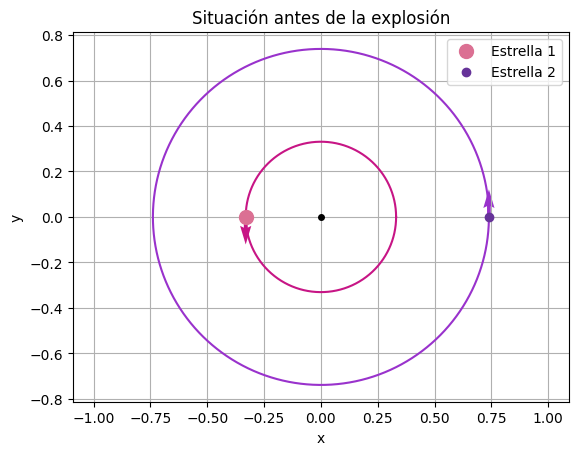

In [ ]:
theta = np.linspace(0, 2 * np.pi, 10000)
#Posiciones para orbitas circulares
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)
x2 = r2 * np.cos(theta)
y2 = r2 * np.sin(theta)

#Órbitas
plt.plot(x1, y1, color='mediumvioletred')
plt.plot(x2, y2, color='darkorchid')
#Posición estrellas
plt.plot(-r1, 0, 'o',color='palevioletred', markersize=10,label='Estrella 1')
plt.plot(r2, 0, 'o',color='rebeccapurple', markersize=6,label='Estrella 2')
plt.plot(0, 0, 'ko', markersize=4) #Centro de masas
plt.quiver(-r1, 0, 0, -v1/1e5, color='mediumvioletred') #Vectores
plt.quiver(r2, 0, 0, v2/1e5, color='darkorchid') #Vectores
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Situación antes de la explosión')
plt.show()

# ***Situación inicial tras la explosión***

En este punto la estrella 1 explota de forma instantanea, por lo que pierde una parte de su masa, esto hace que su masa sea menor que la de su compañera y por lo tanto la nueva masa de la estrella 1 es $qm1$.

La explosión hace que las orbitas ya no sean circulares y cambien a orbitas cónicas. Además, su centro de masa dejará de estar en reposo y cambiará de posición. $R_{cm}=\mu_0\frac{(1-q)}{qm_1+m_2}r_0$, $V_{cm}=\mu_0\frac{(1-q)}{qm_1+m_2}v_0$

El cuerpo de masa reducida $\mu$ se toma como referencia para observar un movimiento relativo de la estrella 2 con respecto a la estrella 1 bajo la acción de una fuerza central. Como la masa 1 es ahora la menor en el sistema, la trayectoria elíptica presentará una mayor excentricidad.

In [ ]:
#Parámetros iniciales tras la explosión
q = 0.35 #Perdida de masa de la estrella 1
R0cm = ((mu_0*(1-q))/(q*m1+m2))*r0 #Posición centro de masas
mu = (q*m1*m2)/(q*m1+m2) #Cuerpo de masa reducida después de la explosión
Vcm = (mu_0*((1-q)/(q*m1+m2)))*v0 #Velocidad del centro de masas

# ***Movimiento relativo de los cuerpos tras la explosión***

***Solución de la ecuacion diferencial de movimiento***

\begin{equation}
    \mu\frac{d^2\vec{r}}{dt^2}=-G\frac{m1m2}{r^2}\hat{r},\mu=\frac{m1m2}{m1+m2}\\
    \hat{r}=\frac{\vec{r}}{||r||} , ||r||=\sqrt{x^2+y^2},\vec{r}=(x,y)\\
    \frac{d^2\vec{r}}{dt^2}=-G\frac{m1m2}{||r||^2\mu}\frac{\vec{r}}{||r||}\\
    \frac{d^2(x,y)}{dt^2}=-G\frac{(m1+m2)(x,y)}{||r||^3}\\
    \frac{d^2x}{dt^2}=-G\frac{(m1+m2)x}{(x^2+y^2)^\frac{3}{2}},\frac{d^2y}{dt^2}=-G\frac{(m1+m2)y}{(x^2+y^2)^\frac{3}{2}}\\
    \frac{dx}{dt}=v_x,\frac{dy}{dt}=v_y\\
    \frac{dv_x}{dt}=-G\frac{(m1+m2)x}{(x^2+y^2)^\frac{3}{2}},\frac{dv_y}{dt}=-G\frac{(m1+m2)y}{(x^2+y^2)^\frac{3}{2}}\\
\end{equation}

Como lo que interesa en este problema es saber como cambia el movimiento de los cuerpos después de la explosión, se modificará la ecuacion diferencial con la constante de perdida de masa.

\begin{equation}
    \mu=\frac{qm1m2}{qm1+m2}\\
    \frac{dx}{dt}=v_x,\frac{dy}{dt}=v_y\\
    \frac{dv_x}{dt}=-G\frac{(qm1+m2)x}{q(x^2+y^2)^\frac{3}{2}},\frac{dv_y}{dt}=-G\frac{(qm1+m2)y}{q(x^2+y^2)^\frac{3}{2}}\\
\end{equation}

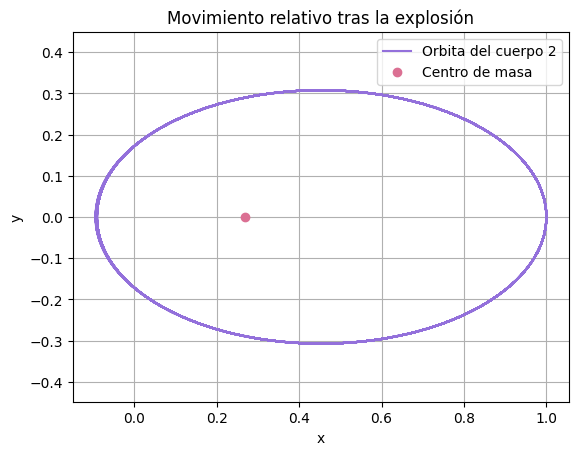

In [ ]:
#Movimienmto relativo de la estrella 2 con respecto a la supernova

C_G = 4*np.pi**2 #Constante gravitacional

#Ecuación diferencial
def f(u,t):
    x,vx,y,vy = u
    dxdt= vx
    dvxdt = -(C_G*(q*m1+m2)*x)/(q*(x**2 + y**2)**(3/2))
    dydt = vy
    dvydt = -(C_G*(q*m1+m2)*y)/(q*(x**2 + y**2)**(3/2))
    return [dxdt,dvxdt,dydt,dvydt]

#[posicion_x,velocidad_x,posicion_y,velocidad_y]
u0 = [1,0,0,7]
t = np.linspace(0,5,5000)
trayectory = spi.odeint(f,u0,t)

plt.plot(trayectory[:,0],trayectory[:,2],color='mediumpurple',label='Orbita del cuerpo 2')
plt.plot(R0cm,0,'o',color='palevioletred',label='Centro de masa')
plt.axis('equal')
plt.title('Movimiento relativo tras la explosión')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# ***Movimiento de cada uno de los cuerpos tras la explosión***

Tras la explosión, los cuerpos describen orbitas elipticas, esto se debe a que la energia total del centro de masa $E_{cm}=\frac{1}{2}\mu v_0^2-\frac{Gqm_1m_2}{r_0}$ es menor a 0 y su momento angular es $L_{cm}=q\frac{m_1m_2}{qm_1+m_2}\sqrt{G(m_1+m_2)r_0}$

Con las leyes de kepler se darán a conocer las caracteristicas de estas trayectorias, para así saber el movimiento que hacen con el tiempo las dos estrellas después de la catastrofe.

La distancia del punto de fuerzas al cuerpo de masa reducido es $r=\frac{d}{1+\epsilon cos \theta}$

La excentricidad y el parámetro d se relacionan con el momento angular y la energia total del centro de masa.
$d=\frac{L_{cm}^2}{\mu Gqm_1m_2}=\frac{m_1+m_2}{qm_1+m2}r_0$, $\epsilon=\sqrt{1+\frac{2L_{cm}^2E_{cm}}{\mu (Gqm_1m_2)^2}}=\frac{m_1(1-q)}{qm_1+m_2}$

Semieje mayor de la elíptica $a=\frac{d}{1-\epsilon^2}$

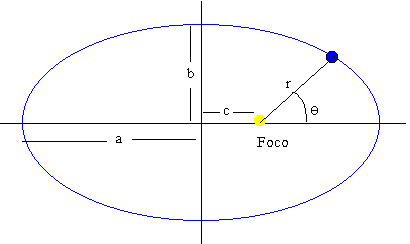

Se sabe que el periodo de una orbita es $T=\frac{2\pi r}{v}$, utilizando la ecuación de la orbita que se planteo más arriba se halla el periodo de la elíptica que se plantea. Se reemplaza la velocidad $v=\frac{2\pi r}{T}$ en
$\frac{Gm_1m_2}{r^2}=\frac{\mu (2\pi r)^2}{rT^2}$ y se despeja T finalmente.
$T^2=\frac{4\pi^2\mu}{Gm_1m_2}r^3$, en este caso se reemplaza r por el semieje mayor.

$T = 2\pi \frac{\sqrt{\mu a^3}}{\sqrt{Gm_1m_2}}$

***Ecuación de Kepler***

La ecuación de Kepler nos da la relacion entre la coordenada θ de un cuerpo en función del tiempo medido desde la posición inicial, permite conocer las trayectorias de los dos cuerpos en un determinado tiempo. $M = E-\epsilon sinE$

Al resolver esta ecuación se puede conocer E (anomalía excentrica), que determina la posición exacta de un cuerpo celeste en cualquier momento dado.

M (anomalía media) es la medida angular que avanza con el tiempo de 0 a $2\pi$ a lo largo de un periodo orbital T, relaciona la posición en una orbita elíptica con el tiempo. $M=\frac{2\pi}{T}t$

La anomalía verdadera (θ) es el ángulo entre el perigeo de la orbita y la posición del cuerpo, que se mide desde el centro de masa. Se asegurará que este angulo se mueva entre 0 y $2\pi$. $tan(\frac{θ}{2})=\sqrt{\frac{1+\epsilon}{1-\epsilon}}tan(\frac{E}{2})$ = $θ=2tan^{-1}(\sqrt{\frac{1+\epsilon}{1-\epsilon}}tan(\frac{E}{2}))$

Se planteará $E_0$ como una estimación inicial de la anomalía excentrica para encontrar la solución precisa. Para encontrar la solución se utilizará la funcion $fsolve$ de scipy que resuelve ecuaciones no lineales, la funcion es $f(E)=E-\epsilon sinE - M$



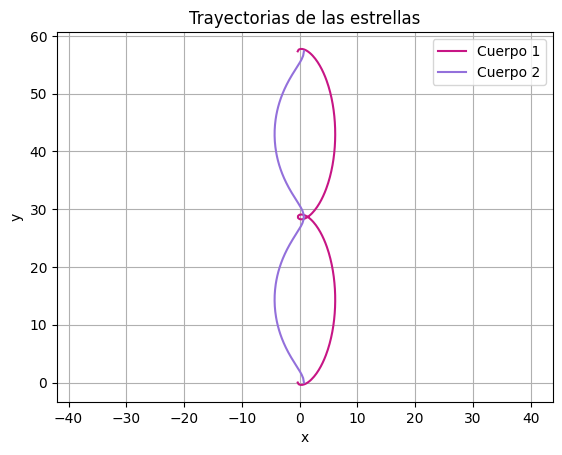

In [ ]:
#Cálculos iniciales de la trayectoria
#Eliptica
ex = m1*(1-q)/(q*m1+m2) #Excentricidad
d = (m1+m2)*r0/(q*m1+m2) #Parámetro d
a = d/(1-ex**2)  #Semieje mayor
T = 2*np.pi*(a*RS)**(3/2)/np.sqrt(C_G*(q*m1+m2)*MS) #Periodo

#Centro de masa
Vcm = mu_0*((1-q)/(q*m1+m2))*v0 #Velocidad del centro de masa
Rcm = mu_0*((1-q)/(q*m1+m2))*r0 #Posición inicial del centro de masa

#Posiciones
num_points = 200
x1 = np.zeros(num_points)
y1 = np.zeros(num_points)
x2 = np.zeros(num_points)
y2 = np.zeros(num_points)

#Cálculo de posiciones
for i, t in enumerate(np.linspace(0,2*T,num_points)): #Cálculo de posiciones durante dos periodos orbitales
    Me = 2*np.pi*t/T #Anomalía media
    E0 = Me - ex / 2 #Estimación inicial de la anomalía excentrica
    f = lambda x: x - ex * np.sin(x) - Me #Ecuación trascendental de Kepler
    E = fsolve(f, E0)[0] #anomalía excentrica
    th = 2*np.arctan(np.sqrt((1+ex)/(1-ex))*np.tan(E/2)) #anomalía verdadera
    if th < 0:
        th += 2 * np.pi #θ se mueve entre 0 y 2pi

    #Posición de cada uno de los cuerpos
    x1[i] = Rcm - (m2/(q*m1+m2))*(d/(1+ex*np.cos(th)))*np.cos(th)
    y1[i] = Vcm*t/RS - (m2/(q*m1+m2))*(d/(1+ex*np.cos(th)))*np.sin(th)
    x2[i] = Rcm + ((q*m1)/(q*m1+m2))*(d/(1+ex*np.cos(th)))*np.cos(th)
    y2[i] = Vcm*t/RS + ((q*m1)/(q*m1+m2))*(d/(1+ex*np.cos(th)))*np.sin(th)

plt.plot(x1, y1, color='mediumvioletred', label='Cuerpo 1')
plt.plot(x2, y2, color='mediumpurple', label='Cuerpo 2')
plt.axis('equal')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias de las estrellas')
plt.legend()
plt.show()